In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pyodbc
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
pd.set_option('display.max_columns', None) # to view all the column details without truncation

In [3]:
# SWM Project connection string for SQL Server
connection_string = 'DRIVER={SQL Server};SERVER=192.168.0.100;DATABASE=MFB_LIVE;UID=sa;PWD=scs@123'
connection = pyodbc.connect(connection_string)

# SWM SQL query to select all records from the required table
query = "SELECT * FROM DP_MFB_BASE WHERE R_NO = 1"

# Execute the query and store the result in a DataFrame
df = pd.read_sql(query, connection)
df # Top 5 and bottom 5 rows and columns details

,NUM_1,UNID,UNIT_STATUS,ACTION_CODE,LATITUDE,LONGITUDE,STATION,TYCOD,SUB_TYCOD,PRIM_UNIT,ALARM_LEV,CD_TS_CLEAN_DISP,CD_TS_CLEAN,DS_TS_CLEAN,EN_TS_CLEAN,AR_TS_CLEAN,RANGE,R_NO,VEHICLE_TYPE,RESP_TIME_IN_MINS,ACKNOWLEDGE_TIME_IN_MINS,LEAVE_TIME_IN_MINS,TRAVEL_TIME_IN_MINS,INCI_COMBINED,HOUR_INCI_BIN,MNTH,YR,MNTH_NAME,MNTH_YR,DAY_OF_WEEK,CLEAN_DATE
0,F202301231,MP61,Dispatch,29,19.247632,72.862479,DAHISAR,RESCUE_SERVICE,BIRD_RESCUE,MP61,1,2023-01-20 13:55:53,2023-01-20 13:56:05,2023-01-20 13:56:05,2023-01-20 13:58:02,2023-01-20 14:03:59,REGION-4,1,MP,8.10,0.20,1.95,5.95,F202301231MP61,AFTERNOON,1,2023,January,Jan_2023,Friday,2023-01-20
1,F202301242,BK23,Dispatch,29,18.934805,72.834626,FORT,RESCUE_SERVICE,BIRD_RESCUE,BK23,1,2023-01-20 16:42:34,2023-01-20 16:42:49,2023-01-20 16:42:49,2023-01-20 16:50:01,2023-01-20 17:02:17,REGION-1,1,BK,19.72,0.25,7.20,12.27,F202301242BK23,AFTERNOON,1,2023,January,Jan_2023,Friday,2023-01-20
2,F202301364,MP39,Dispatch,29,19.230020,72.840612,BORIVALI,RESCUE_SERVICE,BIRD_RESCUE,MP39,1,2023-01-22 07:58:19,2023-01-22 08:05:11,2023-01-22 08:05:11,2023-01-22 08:05:46,2023-01-22 08:16:01,REGION-4,1,MP,17.70,6.87,0.58,10.25,F202301364MP39,MORNING,1,2023,January,Jan_2023,Sunday,2023-01-22
3,F202300310,BK11,Dispatch,29,19.261711,72.851505,KANDARPADA,FIRE_CALL,FIRE_CALL,BK11,1,2023-01-08 13:45:10,2023-01-08 13:45:26,NaT,NaT,NaT,REGION-4,1,BK,0.00,0.00,0.00,0.00,F202300310BK11,AFTERNOON,1,2023,January,Jan_2023,Sunday,2023-01-08
4,F202300321,MP36,Dispatch,29,19.197250,72.871520,DINDOSHI,RESCUE_SERVICE,BIRD_RESCUE,MP36,1,2023-01-08 16:40:36,2023-01-08 16:40:48,NaT,NaT,NaT,REGION-4,1,MP,0.00,0.00,0.00,0.00,F202300321MP36,AFTERNOON,1,2023,January,Jan_2023,Sunday,2023-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15983,F202312679,MP43,Dispatch,29,19.070771,72.868015,BKC,FIRE_CALL,FIRE_CALL,MP43,1,2023-09-08 16:56:47,2023-09-08 16:57:44,2023-09-08 16:57:44,2023-09-08 17:00:23,2023-09-08 17:36:08,REGION-3,1,MP,39.35,0.95,2.65,35.75,F202312679MP43,AFTERNOON,9,2023,September,Sep_2023,Friday,2023-09-08
15984,F202312726,MP34,Dispatch,29,18.961477,72.812637,GAWALATANK,RESCUE_SERVICE,ANIMAL_RESCUE,MP34,1,2023-09-10 09:42:16,2023-09-10 09:43:39,2023-09-10 09:43:39,2023-09-10 10:20:56,2023-09-10 10:21:02,REGION-1,1,MP,38.77,1.38,37.28,0.10,F202312726MP34,MORNING,9,2023,September,Sep_2023,Sunday,2023-09-10
15985,F202312887,MP38,Dispatch,29,19.201187,72.858109,KANDIVALI,RESCUE_SERVICE,BIRD_RESCUE,MP38,1,2023-09-16 17:45:32,2023-09-16 18:35:48,2023-09-16 18:35:48,2023-09-16 18:36:28,2023-09-16 19:43:49,REGION-4,1,MP,118.28,50.27,0.67,67.35,F202312887MP38,EVENING,9,2023,September,Sep_2023,Saturday,2023-09-16
15986,F202312981,MP59,Dispatch,29,18.957974,72.832664,MEMONWADA,HOUSE_COLLAPSE,HOUSE_COLLAPSE,MP59,1,2023-09-19 12:44:34,2023-09-19 12:45:08,2023-09-19 12:45:08,2023-09-19 12:48:52,2023-09-19 13:01:37,REGION-1,1,MP,17.05,0.57,3.73,12.75,F202312981MP59,AFTERNOON,9,2023,September,Sep_2023,Tuesday,2023-09-19


In [4]:
# Group by 'CLEAN_DATE' and count occurrences of 'NUM_1'
df_grouped = df.groupby('CLEAN_DATE', as_index=False)['NUM_1'].count()

# Rename the count column to 'NUM_1_Count'
df_grouped.rename(columns={'NUM_1': 'NUM_1_Count'}, inplace=True)

# Print or display the resulting DataFrame
df_grouped

,CLEAN_DATE,NUM_1_Count
0,2022-11-30,25
1,2022-12-01,29
2,2022-12-02,37
3,2022-12-03,42
4,2022-12-04,28
...,...,...
382,2023-12-17,27
383,2023-12-18,35
384,2023-12-19,30
385,2023-12-20,30


In [5]:
# Group by 'CLEAN_DATE' and count occurrences of 'NUM_1'
grouped_indexed = df.groupby('CLEAN_DATE')['NUM_1'].count().reset_index(name='NUM_1_Count')

# Set 'CLEAN_DATE' as the index
grouped_indexed.set_index('CLEAN_DATE', inplace=True)

# Print or display the resulting DataFrame
grouped_indexed

,NUM_1_Count
CLEAN_DATE,
2022-11-30,25
2022-12-01,29
2022-12-02,37
2022-12-03,42
2022-12-04,28
...,...
2023-12-17,27
2023-12-18,35
2023-12-19,30


<Axes: xlabel='CLEAN_DATE'>

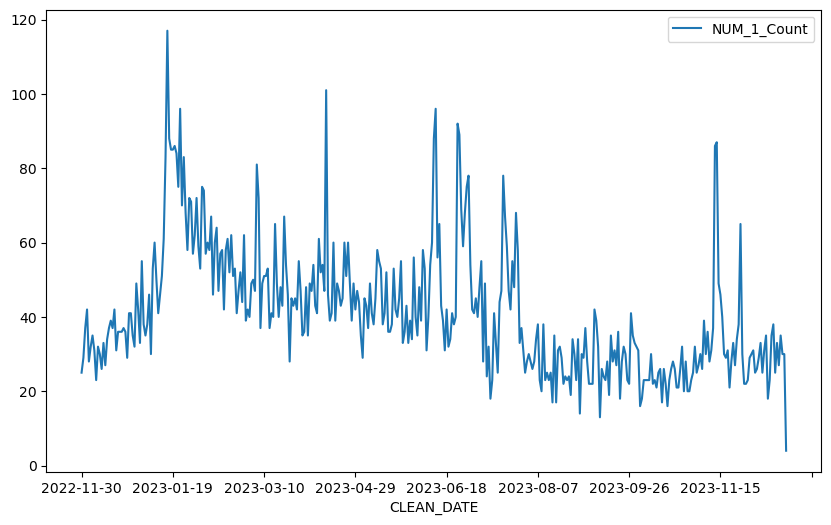

In [6]:
grouped_indexed.plot()

In [7]:
grouped_indexed.NUM_1_Count.max() # shows the maximum value in the column

117

In [8]:
grouped_indexed.NUM_1_Count.min() # shows the minimum value in the column

4

In [9]:
round(grouped_indexed.describe(),3) # rounding off the numbers till 3 decimal places

,NUM_1_Count
count,387.000
mean,41.313
std,17.176
min,4.000
25%,29.000
50%,38.000
75%,49.000
max,117.000


In [10]:
grouped_indexed['Differenced_Count'] = grouped_indexed['NUM_1_Count'].diff() # first order differencing
grouped_indexed

,NUM_1_Count,Differenced_Count
CLEAN_DATE,,
2022-11-30,25,NaN
2022-12-01,29,4.0
2022-12-02,37,8.0
2022-12-03,42,5.0
2022-12-04,28,-14.0
...,...,...
2023-12-17,27,-6.0
2023-12-18,35,8.0
2023-12-19,30,-5.0


In [11]:
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller
test_results = adfuller(df_grouped['NUM_1_Count'])

In [12]:
# H0: It is non stationary
# H1: It is stationary

def adfuller_test(count):
    result = adfuller(count)
    labels = ['ADF Test Statistics', 'p-value', 'Number of lags used', 'Number of observations used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1]<=0.05:
        print("Strong evidence against null hypothesis H0, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis H0, time series has a unit root indicating it is not stationary")
        
adfuller_test(df_grouped['NUM_1_Count'])

ADF Test Statistics:-2.3096479132137797
p-value:0.1688752057570228
Number of lags used:11
Number of observations used:375
Weak evidence against null hypothesis H0, time series has a unit root indicating it is not stationary


In [13]:
# Autocorrelation function (ACF) and Partial Autocorrelation Function (PACF) graphs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

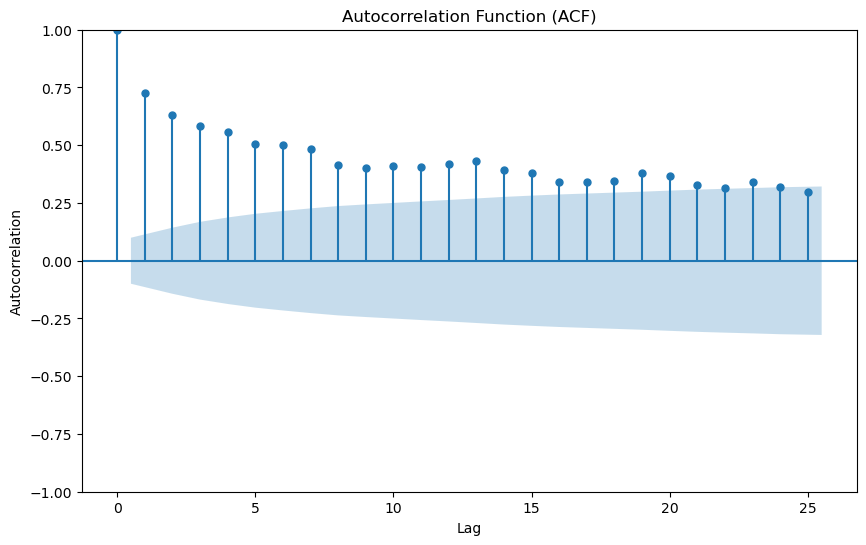

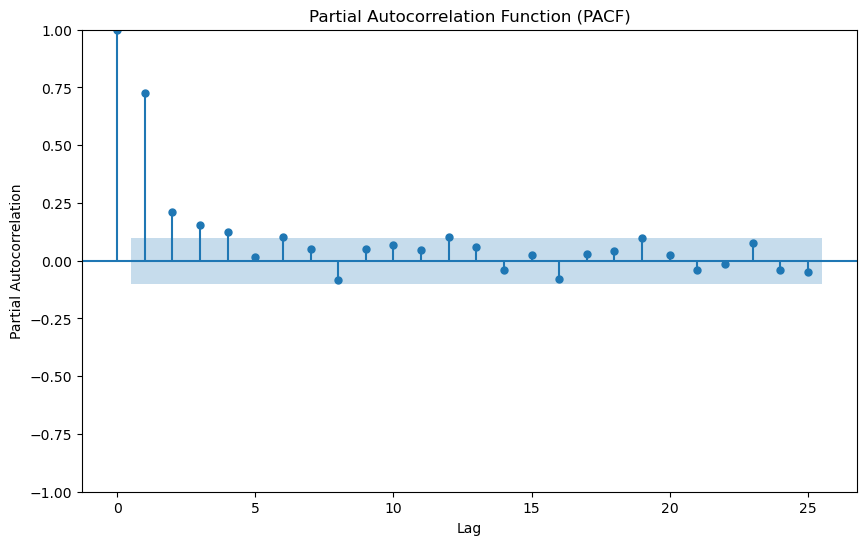

In [14]:
# Plot ACF
plot_acf(df_grouped['NUM_1_Count'], lags=25)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plot_pacf(df_grouped['NUM_1_Count'], lags=25)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [15]:
# Calculate IQR
Q1 = df_grouped['NUM_1_Count'].quantile(0.25)
Q3 = df_grouped['NUM_1_Count'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
outliers_iqr = df_grouped[(df_grouped['NUM_1_Count'] < Q1 - 1.5 * IQR) | (df_grouped['NUM_1_Count'] > Q3 + 1.5 * IQR)]

# Calculate Z-score
z_scores = np.abs((df_grouped['NUM_1_Count'] - df_grouped['NUM_1_Count'].mean()) / df_grouped['NUM_1_Count'].std())

# Define a threshold for Z-score to identify outliers (e.g., Z-score > 3)
threshold_z = 3
outliers_z = df_grouped[z_scores > threshold_z]

# Remove outliers using both methods
df_no_outliers_iqr = df_grouped[~((df_grouped['NUM_1_Count'] < Q1 - 1.5 * IQR) | (df_grouped['NUM_1_Count'] > Q3 + 1.5 * IQR))]
df_no_outliers_z = df_grouped[z_scores <= threshold_z]

print("Original DataFrame:")
print(df_grouped)
print("\nOutliers using IQR method:")
print(outliers_iqr)
print("\nOutliers using Z-score method:")
print(outliers_z)
print("\nDataFrame without outliers using IQR method:")
print(df_no_outliers_iqr)
print("\nDataFrame without outliers using Z-score method:")
print(df_no_outliers_z)

Original DataFrame:
     CLEAN_DATE  NUM_1_Count
0    2022-11-30           25
1    2022-12-01           29
2    2022-12-02           37
3    2022-12-03           42
4    2022-12-04           28
..          ...          ...
382  2023-12-17           27
383  2023-12-18           35
384  2023-12-19           30
385  2023-12-20           30
386  2023-12-21            4

[387 rows x 2 columns]

Outliers using IQR method:
     CLEAN_DATE  NUM_1_Count
46   2023-01-15           83
47   2023-01-16          117
48   2023-01-17           88
49   2023-01-18           85
50   2023-01-19           85
51   2023-01-20           86
52   2023-01-21           84
54   2023-01-23           96
56   2023-01-25           83
96   2023-03-06           81
134  2023-04-13          101
193  2023-06-11           88
194  2023-06-12           96
206  2023-06-24           92
207  2023-06-25           89
347  2023-11-12           86
348  2023-11-13           87

Outliers using Z-score method:
     CLEAN_DATE  NUM_1_Cou

In [16]:
# using the IQR outlier removed dataframe now
df_no_outliers_iqr

,CLEAN_DATE,NUM_1_Count
0,2022-11-30,25
1,2022-12-01,29
2,2022-12-02,37
3,2022-12-03,42
4,2022-12-04,28
...,...,...
382,2023-12-17,27
383,2023-12-18,35
384,2023-12-19,30
385,2023-12-20,30


In [17]:
# H0: It is non stationary
# H1: It is stationary

def adfuller_test(count):
    result = adfuller(count)
    labels = ['ADF Test Statistics', 'p-value', 'Number of lags used', 'Number of observations used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1]<=0.05:
        print("Strong evidence against null hypothesis H0, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis H0, time series has a unit root indicating it is not stationary")
        
adfuller_test(df_no_outliers_iqr['NUM_1_Count'])

ADF Test Statistics:-2.053897826120635
p-value:0.26345175052563286
Number of lags used:10
Number of observations used:359
Weak evidence against null hypothesis H0, time series has a unit root indicating it is not stationary


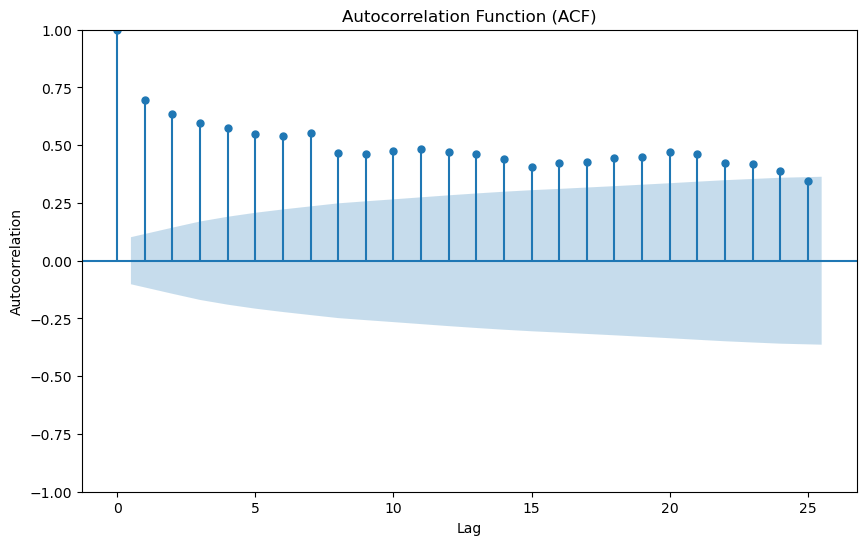

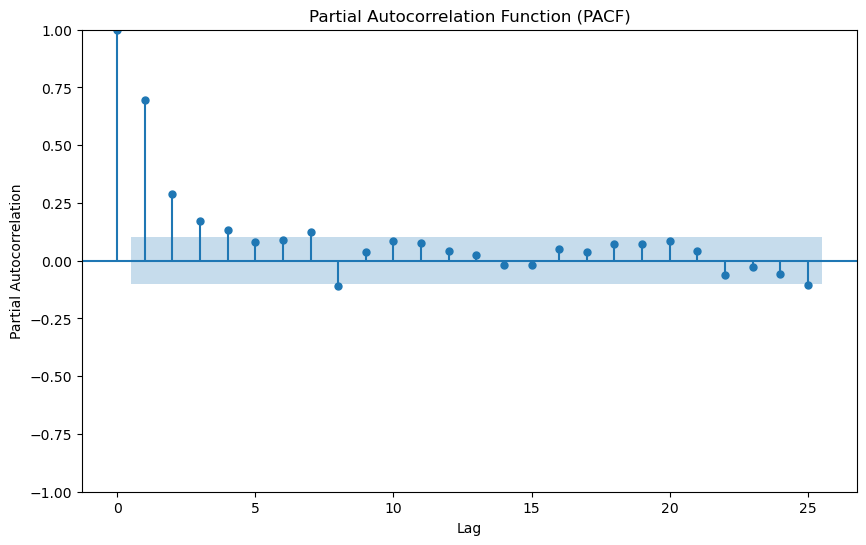

In [18]:
# Plot ACF
plot_acf(df_no_outliers_iqr['NUM_1_Count'], lags=25)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plot_pacf(df_no_outliers_iqr['NUM_1_Count'], lags=25)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [19]:
df_no_outliers_iqr

,CLEAN_DATE,NUM_1_Count
0,2022-11-30,25
1,2022-12-01,29
2,2022-12-02,37
3,2022-12-03,42
4,2022-12-04,28
...,...,...
382,2023-12-17,27
383,2023-12-18,35
384,2023-12-19,30
385,2023-12-20,30


In [20]:
# Convert "CLEAN_DATE" column to datetime format
df_no_outliers_iqr['CLEAN_DATE'] = pd.to_datetime(df_no_outliers_iqr['CLEAN_DATE'])

# Apply first-order differencing to "NUM_1_Count" column
df_no_outliers_iqr['Diff_NUM_1_Count'] = df_no_outliers_iqr['NUM_1_Count'].diff()

# Apply log transformation to the differenced column (adding 1 to avoid log of zero or negative values)
df_no_outliers_iqr['Log_Diff_NUM_1_Count'] = np.log1p(df_no_outliers_iqr['Diff_NUM_1_Count'])

df_no_outliers_iqr

,CLEAN_DATE,NUM_1_Count,Diff_NUM_1_Count,Log_Diff_NUM_1_Count
0,2022-11-30,25,NaN,NaN
1,2022-12-01,29,4.0,1.609438
2,2022-12-02,37,8.0,2.197225
3,2022-12-03,42,5.0,1.791759
4,2022-12-04,28,-14.0,NaN
...,...,...,...,...
382,2023-12-17,27,-6.0,NaN
383,2023-12-18,35,8.0,2.197225
384,2023-12-19,30,-5.0,NaN
385,2023-12-20,30,0.0,0.000000


In [21]:
# Handle NaN values (dropping them for simplicity)
df_no_outliers_iqr.dropna(inplace=True)

# Split data into train and test sets (e.g., 80% train, 20% test)
train_size = int(len(df_no_outliers_iqr) * 0.8)
train_data = df_no_outliers_iqr.iloc[:train_size]
test_data = df_no_outliers_iqr.iloc[train_size:]

In [22]:
train_data.isna().sum()

CLEAN_DATE              0
NUM_1_Count             0
Diff_NUM_1_Count        0
Log_Diff_NUM_1_Count    0
dtype: int64

In [23]:
train_data.shape

(164, 4)

In [24]:
test_data.isna().sum()

CLEAN_DATE              0
NUM_1_Count             0
Diff_NUM_1_Count        0
Log_Diff_NUM_1_Count    0
dtype: int64

In [25]:
test_data.shape

(42, 4)

C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Actual Values: [26 23 26 28 21 26 32 28 20 23 25 32 27 30 39 36 31 37 49 29 31 28 33 34
 38 65 22 23 29 30 31 26 29 33 31 35 23 35 38 33 35 30]
Forecasted Values: 164    25.765352
165    25.699007
166    25.680249
167    25.674945
168    25.673446
169    25.673022
170    25.672902
171    25.672868
172    25.672858
173    25.672855
174    25.672855
175    25.672854
176    25.672854
177    25.672854
178    25.672854
179    25.672854
180    25.672854
181    25.672854
182    25.672854
183    25.672854
184    25.672854
185    25.672854
186    25.672854
187    25.672854
188    25.672854
189    25.672854
190    25.672854
191    25.672854
192    25.672854
193    25.672854
194    25.672854
195    25.672854
196    25.672854
197    25.672854
198    25.672854
199    25.672854
200    25.672854
201    25.672854
202    25.672854
203    25.672854
204    25.672854
205    25.672854
dtype: float64
Mean Absolute Error (MAE): 6.4864362832290094
Mean Squared Error (MSE): 88.01586668149953
Root Mean Squared 

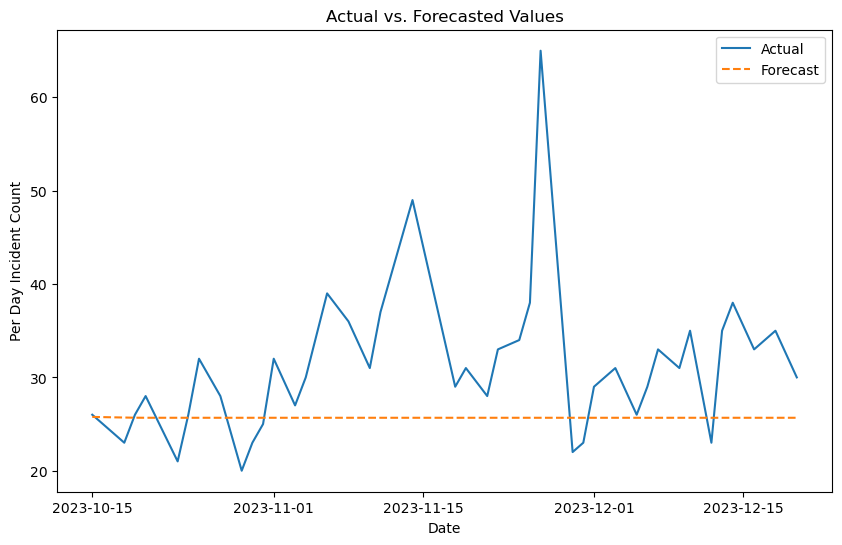

In [26]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Perform automatic ARIMA modeling
auto_model = auto_arima(train_data['NUM_1_Count'], seasonal=False, suppress_warnings=True)

# Forecast future values
forecast_steps = len(test_data)
forecast = auto_model.predict(n_periods=forecast_steps)

# Get actual values from the test data
actual_values = test_data['NUM_1_Count'].values

# Calculate performance metrics
mae = mean_absolute_error(actual_values, forecast)
mse = mean_squared_error(actual_values, forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100

print("Actual Values:", actual_values)
print("Forecasted Values:", forecast)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Plot actual and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.CLEAN_DATE, actual_values, label='Actual')
plt.plot(test_data.CLEAN_DATE, forecast, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Per Day Incident Count')
plt.title('Actual vs. Forecasted Values')
plt.legend()
plt.show()

In [27]:
train_data.Log_Diff_NUM_1_Count.describe()

count    164.000000
mean           -inf
std             NaN
min            -inf
25%        1.098612
50%        1.945910
75%        2.583476
max        3.465736
Name: Log_Diff_NUM_1_Count, dtype: float64

The above negative inf values indicate infinite values post the Logarithmic Transformation which cannot be fed to a model for any kind of learning as null values and infinite values cannot be processed and needs to be dealt with properly.